Some illustrations of 
* constrained optimization, 
* gradient vector fields,
* SciPy optimize

for [Math for Finance Chapter 11](https://www.softcover.io/read/bf34ea25/math_for_finance/multivariable_methods). 

In [2]:
import numpy as np
from scipy.stats import multivariate_normal as mvn

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [53]:
# 2 dimensional XY space. Meshgrid makes a grid of x, y values, then dstack combines them into columns
N=51
x = np.linspace(-3, 3, N)
y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(x, y)
position = np.dstack((X,Y))

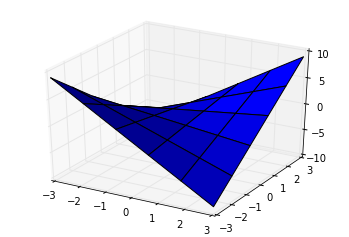

In [54]:
# First, an easy function, f(x,y)=xy
Z = X*Y
# Now try plotting it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

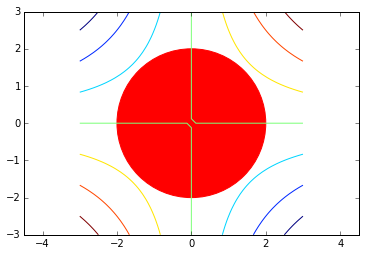

In [55]:
# Let's look at the contour plot and then put a circle on it

ax = plt.gca()
ax.axis('equal')
ax.contour(X, Y, Z)
circle1=plt.Circle((0,0),2,color='r')
plt.gcf().gca().add_artist(circle1)

<matplotlib.contour.QuadContourSet instance at 0x118358c20>

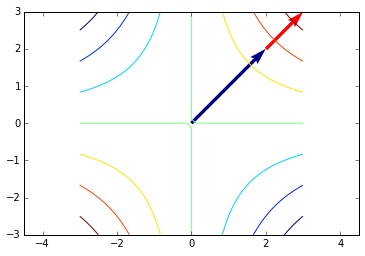

In [56]:
# Can you see where the gradient of the f(x,y)=xy function and the 
# normal vector to the circle share the same direction?
ax = plt.gca()
ax.axis('equal')
ax.quiver(2,2,1,1, width=0.01, color='r',angles='xy', scale_units='xy', scale=1)
ax.quiver(2,2,np.gradient(x*y),width=0.01, color='b',angles='xy', scale_units='xy', scale=1)
plt.contour(X,Y,Z)

<matplotlib.contour.QuadContourSet instance at 0x118753b00>

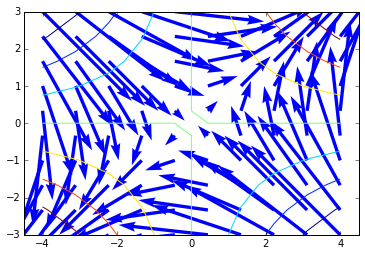

In [57]:
# Let's create a vector field, drawing the gradient vector at a lot of points. To get a good pic, need a coarser grid.
cN=10
cx = np.linspace(-4, 4, cN)
cy = np.linspace(-3, 3, cN)
cX, cY = np.meshgrid(cx, cy)
cposition = np.dstack((cX,cY))
cZ=cX*cY
# Now set limits and axes
ax = plt.gca()
ax.axis('equal')
ax.set_xlim([-4,4])
ax.set_ylim([-3,3])
# Notice two weird things: one, gradient in numpy returns the "wrong order", and 
# two, I have to scale the arrows so it doesn't look ridiculous.
# Each gradient arrow gives "direction of fastest ascent"
ax.quiver(cX,cY,0.1*np.gradient(cZ)[1],0.1*np.gradient(cZ)[0],width=0.01, color='b', scale=1)
plt.contour(cX,cY,cZ)


<matplotlib.contour.QuadContourSet instance at 0x1187b8878>

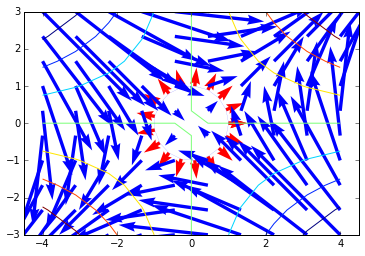

In [58]:
# Then let's put the circle x^2+y^2 = 1 on top, with its normal vectors
t = np.linspace(0,np.pi*2,18)
ax = plt.gca()
ax.axis('equal')
ax.set_xlim([-4,4])
ax.set_ylim([-3,3])
ax.plot(np.cos(t), np.sin(t), linewidth=.1)
ax.quiver(np.cos(t),np.sin(t),.1*2*np.cos(t),.1*2*np.sin(t),width=0.01, color='r')
ax.quiver(cX,cY,0.1*np.gradient(cZ)[1],0.1*np.gradient(cZ)[0],width=0.01, color='b', scale=1)
plt.contour(cX,cY,cZ)

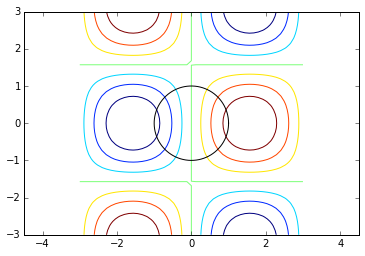

In [68]:
# The gradient vector field/normal vectors are fun, but as you can see the graphs get cluttered.
# They illustrate the idea that when using Lagrange multipliers you want the gradient vectors
# for the function and the constraint to line up. 
# You can do this visualization only using contours, though:
# Let's find the maxes/mins of f(x,y)=sin(x)*cos(y) subject to x^2+y^2 = 1.
newZ=np.sin(X)*np.cos(Y)
ax = plt.gca()
ax.axis('equal')
ax.contour(X, Y, newZ)
t = np.linspace(0,np.pi*2,180)
ax.plot(np.cos(t), np.sin(t), linewidth=1, color="black")

In [89]:
# Look at the plot and see where you think the circle plot and the contour lines would be tangent.
# Verify min with SciPy optimization
from scipy.optimize import minimize
def f(points):
    # print(params)  # <-- you'll see that params is a NumPy array
    x,y = points # <-- for readability you may wish to assign names to the component variables
    return np.sin(x)*np.cos(y)

def circle_constraint(points):
    #return value must come back as 0 to be accepted
    #if return value is anything other than 0 it's rejected
    #as not a valid answer.
    circle_con = points[0]**2+points[1]**2-1
    return circle_con

initial_guess = [1, 1]
#cons = ({'type': 'eq', 'fun': x**2+y**2-1})

my_constraints = ({'type': 'eq', "fun": circle_constraint })
result = minimize(f,initial_guess,constraints=my_constraints)
if result.success:
    min_point = result.x
    print(min_point)
else:
    raise ValueError(result.message)

[ -1.00000004e+00   1.03193123e-05]
